공공데이터포탈 https://www.data.go.kr/dataset/3075835/fileData.do  
서울시 5대범죄 발생현황(2019)  

# 서울시 범죄 현황 분석

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 데이터 파악하고 정리하기

In [2]:
# thousands = ',' 로 숫자단위를 지정하던 , 없애기
crime = pd.read_csv('./data/서울시 5대범죄 발생현황(2019).tsv', 
                    sep='\t', header=1, thousands=',')
crime.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [3]:
crime.drop([0], inplace=True)  #인덱스[0]합계부분 가로행삭제 drop
del crime['기간']               # 컬럼기간 세로줄 삭제del
crime.rename({
    '자치구': '구별',
    '발생.1': '살인발생', '검거.1': '살인검거',
    '발생.2': '강도발생', '검거.2': '강도검거',
    '발생.3': '강간발생', '검거.3': '강간검거',
    '발생.4': '절도발생', '검거.4': '절도검거',
    '발생.5': '폭력발생', '검거.5': '폭력검거'
}, inplace=True, axis=1)        #컬럼명변경
crime.head()

,구별,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [4]:
crime.describe()

,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4146.720000,2992.200000,5.440000,5.120000,5.440000,5.320000,258.760000,240.280000,1688.160000,851.360000,2188.920000,1890.120000
std,1182.421651,805.356339,2.973214,2.905741,3.536477,3.325658,147.451484,221.590749,547.886901,239.641726,565.850239,480.402897
min,2110.000000,1497.000000,1.000000,1.000000,1.000000,1.000000,90.000000,83.000000,790.000000,394.000000,1224.000000,1014.000000
25%,3313.000000,2343.000000,3.000000,3.000000,3.000000,3.000000,175.000000,126.000000,1229.000000,634.000000,1816.000000,1585.000000
50%,4011.000000,2964.000000,5.000000,5.000000,5.000000,5.000000,195.000000,158.000000,1565.000000,908.000000,2117.000000,1857.000000
75%,4842.000000,3543.000000,6.000000,6.000000,7.000000,6.000000,273.000000,239.000000,2190.000000,1050.000000,2552.000000,2196.000000
max,7304.000000,5069.000000,13.000000,10.000000,15.000000,14.000000,666.000000,1143.000000,2970.000000,1339.000000,3658.000000,3159.000000


In [5]:
#각종 검거율 계산
crime['살인검거율'] = crime['살인검거'] / crime['살인발생'] * 100
crime['강도검거율'] = crime['강도검거'] / crime['강도발생'] * 100
crime['강간검거율'] = crime['강간검거'] / crime['강간발생'] * 100
crime['절도검거율'] = crime['절도검거'] / crime['절도발생'] * 100
crime['폭력검거율'] = crime['폭력검거'] / crime['폭력발생'] * 100

In [6]:
# 컬럼 세로줄 삭제del/ 인덱스지정
del crime['살인검거']
del crime['강도검거']
del crime['강간검거']
del crime['절도검거']
del crime['폭력검거']
del crime['발생']
del crime['검거']
crime.set_index('구별', inplace=True)
crime.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [7]:
# 검거율이 100을 넘으면 100으로 처리(학습상) 100%
col_list = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
for col in col_list:
    crime.loc[crime[col] > 100, col] = 100

crime.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


## 정규화94p.
파이썬의 머신러닝에 관한 모듈로 유명한 scikit learn(sklearn)  
전처리 preprocessing 도구에는  
최소값, 최대값을 이용해서 정규화시키는 함수가 있다.

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# 다양한 시각화에서 편리해지도록 각 발생건수를 정규화시킴
col = ['살인발생','강도발생','강간발생','절도발생','폭력발생']
x = crime[col].values
x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled, columns=col, index=crime.index)

col2 = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_norm[col2] = crime[col2]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967


In [9]:
#컬럼추가  
crime_norm['범죄'] = np.sum(crime_norm[col], axis=1)  #axis=1가로행을 더해서'범죄'
crime_norm['검거'] = np.sum(crime_norm[col2], axis=1) #가로행을 더해서 '검거'
crime_norm.sort_index(inplace=True)
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거
구별,,,,,,,,,,,,
강남구,0.333333,0.285714,1.000000,1.000000,1.000000,60.000000,100.000000,84.384384,45.084175,86.358666,3.619048,375.827225
강동구,0.416667,1.000000,0.156250,0.394495,0.385785,83.333333,93.333333,86.111111,54.969697,86.638927,2.353197,404.386402
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601,1.403221,394.087296
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,100.000000,100.000000,83.986928,52.536585,85.881893,2.226830,422.405406
관악구,1.000000,0.642857,0.552083,0.657339,0.595727,76.923077,100.000000,82.107843,48.807917,88.593867,3.448007,396.432704


In [10]:
#앞전 01_cctv자료불러오기
df = pd.read_csv('./results/01.cctv.csv')
df.set_index('구별', inplace=True)
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


In [11]:
#컬럼추가하는데 df의 '인구수', '소계'부분을 대입한다
crime_norm[['인구수', 'CCTV']] = df[['인구수', '소계']]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
강남구,0.333333,0.285714,1.000000,1.000000,1.000000,60.000000,100.000000,84.384384,45.084175,86.358666,3.619048,375.827225,544085,5221
강동구,0.416667,1.000000,0.156250,0.394495,0.385785,83.333333,93.333333,86.111111,54.969697,86.638927,2.353197,404.386402,462275,1879
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601,1.403221,394.087296,313550,1265
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,100.000000,100.000000,83.986928,52.536585,85.881893,2.226830,422.405406,589536,1617
관악구,1.000000,0.642857,0.552083,0.657339,0.595727,76.923077,100.000000,82.107843,48.807917,88.593867,3.448007,396.432704,514555,3985


## 시각화 하기  104p.

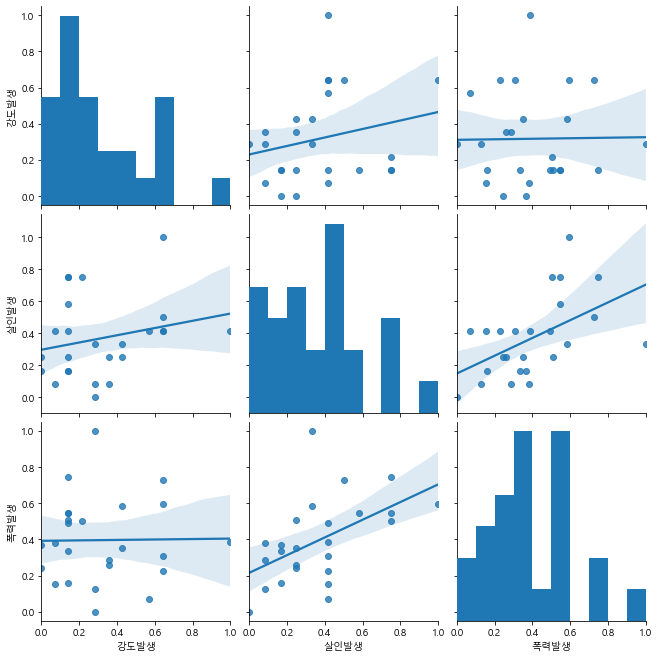

In [13]:
# 서로서로 양의상관관계가 있다고 봐야할까???
# 기울기가 대각선이 아닌데도???
sns.pairplot(crime_norm, vars=['강도발생','살인발생','폭력발생'],
             kind='reg', size=3)
plt.show()

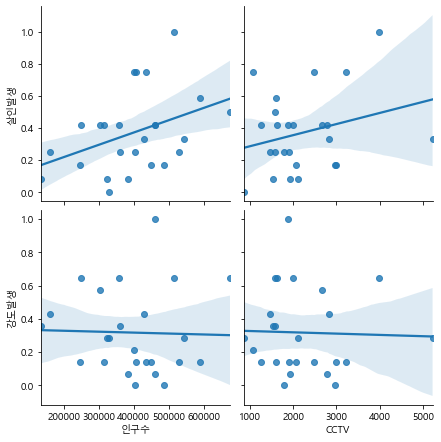

In [14]:
sns.pairplot(crime_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인발생','강도발생'], kind='reg', size=3)
plt.show()
#CCTV가 없을때 강도발생, 살인발생 

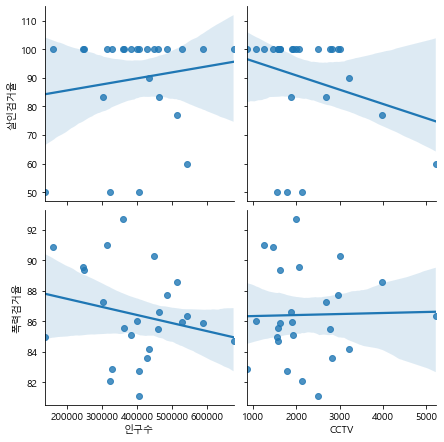

In [14]:
# 폭력검거율과 CCTV의 관계는 음의 상관계수....
# 인구수와 살인 및 폭력 검거율도 음의 상관관계이다...??? 음?? 무슨말이지???
sns.pairplot(crime_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인검거율','폭력검거율'], kind='reg', size=3)
plt.show()

In [15]:
# 히트맵 그리기
# 검거율의 합계인 검거 항목 최고값을 100으로 한정하고, 그 값으로 정렬.
tmp_max = crime_norm['검거'].max()
crime_norm['검거'] = crime_norm['검거'] / tmp_max * 100
crime_norm_sort = crime_norm.sort_values('검거', ascending=False)
crime_norm_sort.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거,인구수,CCTV
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.0,100.0,100.000000,70.561056,90.874159,1.620591,100.000000,159842,1471
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.0,100.0,83.505155,62.428115,87.718470,1.069613,93.978900,485842,2962
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.0,100.0,73.863636,67.560074,90.266584,0.752594,93.553825,449871,3003
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.0,100.0,87.132353,54.454454,89.538310,1.054975,93.431343,244953,2063
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.0,100.0,92.222222,49.873418,82.843137,0.285714,92.090669,329300,858


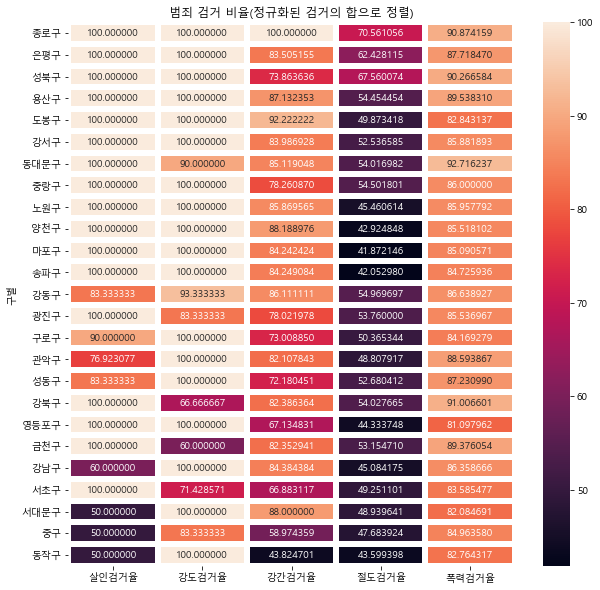

In [16]:
target_col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col], annot=True, fmt='f', linewidths=5)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()
# 절도 검거율이 낮다...
# 근데 왜 히트맵컬러가 책과 다르게 반대로 나왔지????;;;

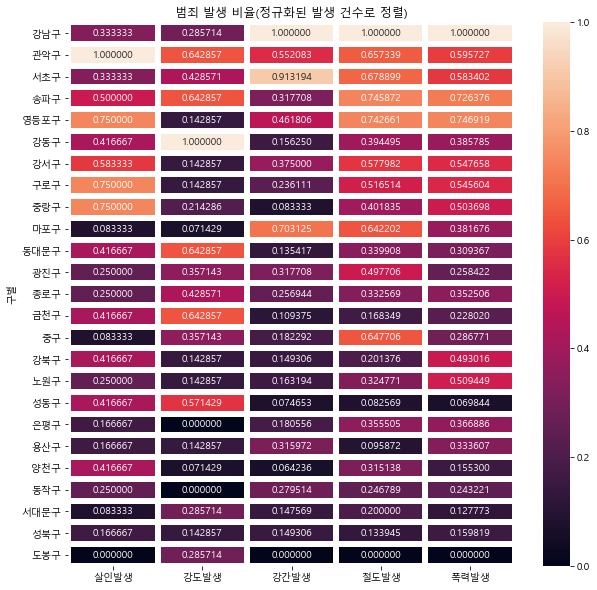

In [17]:
# 발생건수로 히트맵그리기
target_col = ['살인발생','강도발생','강간발생','절도발생','폭력발생']
crime_norm['범죄'] = crime_norm['범죄'] / 5
crime_norm_sort = crime_norm.sort_values('범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col], annot=True, fmt='f', linewidths=5)
plt.title('범죄 발생 비율(정규화된 발생 건수로 정렬)')
plt.show()
#범죄발생건수가 많다;; 강남구 관악구 

In [18]:
crime_norm.to_csv('./results/03.crime.csv')

## 지도 시각화
choropleth 단어는 그리스 말로 choros(장소)와 pletho(정도)를 의미한다.  
따라서 choropleth map이란 시군 등 단위지역(unit area)으로 구성된 지역의 통계량의 크기를 부호로 나타내는 지도이다.



In [19]:
import folium
import json
# 서울시 구별 경계선을 그리는 json파일
geo_str = json.load(open('./data/skorea_municipalities_geo_simple.json', encoding='utf8'))

In [21]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['살인발생'],
               columns = [crime_norm.index, crime_norm['살인발생']],
               fill_color = 'PuRd', #Y1GnBu
               key_on = 'feature.id')
map
#살인발생건수로 지도시각화 

In [22]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['강간발생'],
               columns = [crime_norm.index, crime_norm['강간발생']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map
#강간발생건수로 지도시각화

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['범죄'],
               columns = [crime_norm.index, crime_norm['범죄']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map
#범죄건수로 지도시각화

In [22]:
# 인구 대비 범죄 발생 비율알아보기 (118p)
tmp_criminal = crime_norm['살인발생'] / crime_norm['인구수'] * 1000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_norm.index, tmp_criminal],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map
#의외로 강남은 인구대비 범죄발생이 적은편이였다?ㅋㅋㅋ

## 카카오 API로 경찰서 크롤링, 경찰서의 위도 경도 구하기

In [26]:
# 경찰서 정보 크롤링하기 (경찰청홈페이지 전국경찰관서안내)
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = 'https://www.police.go.kr/user/bbs/BD_selectBbsList.do?q_bbsCode=1038&q_tab=1'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [27]:
#경찰청홈페이지 전국경찰관서안내 F12
station_list = soup.select_one('.col-md-9')
tbody = station_list.find('tbody')
trs = tbody.find_all('tr')
names, addrs = [], []
for tr in trs:
    tds = tr.find_all('td')
    st_nm = tds[0].get_text()
    st_addr = tds[1].get_text().rstrip(' ')
    names.append(st_nm)
    addrs.append(st_addr)

In [28]:
#크롤링한 정보(관서,주소)로 데이터프레임만들기
pdf = pd.DataFrame({
    '관서명': names,
    '주소': addrs
})
pdf.drop([0], inplace=True)
pdf.head()

,관서명,주소
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11
2,서울강동경찰서,서울시 강동구 성내로 57
3,서울강북경찰서,서울시 강북구 오패산로 406
4,서울강서경찰서,서울시 양천구 화곡로 73
5,서울관악경찰서,서울시 관악구 관악로5길 33


In [29]:
# 크롤링한 주소들을 카카오API를 사용해 "경도,위도" 구하기
import requests
from urllib.parse import quote  #urlparse 하기도함
#카카오키불러오기
key_fd = open('../06.RestAPI/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [30]:
lat_list, lng_list = [], []
for i in pdf.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(pdf['주소'][i])
    result = requests.get(url,
            headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    lat_list.append(lat)
    lng_list.append(lng)

In [31]:
pdf['lat'], pdf['lng'] = lat_list, lng_list
pdf.head()

,관서명,주소,lat,lng
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11,37.509367,127.067100
2,서울강동경찰서,서울시 강동구 성내로 57,37.528678,127.126957
3,서울강북경찰서,서울시 강북구 오패산로 406,37.637170,127.027042
4,서울강서경찰서,서울시 양천구 화곡로 73,37.539801,126.829982
5,서울관악경찰서,서울시 관악구 관악로5길 33,37.474234,126.951870


In [32]:
# 컬러맵choropleth에 경찰서위치표시
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['검거'],
               columns = [crime_norm.index, crime_norm['검거']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in pdf.index:
    folium.CircleMarker([pdf.lat[i], pdf.lng[i]], radius=10,
                        tooltip=pdf['관서명'][i],
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map
#강남은 검거가 잘안되는동네;;
# 강북쪽이 검거가 잘 되는 동네~~

In [33]:
crime_norm.to_csv('./results/03.crime_norm.csv')
pdf.to_csv('./results/03.police.csv')

In [49]:
crime_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   살인발생    25 non-null     float64
 1   강도발생    25 non-null     float64
 2   강간발생    25 non-null     float64
 3   절도발생    25 non-null     float64
 4   폭력발생    25 non-null     float64
 5   살인검거율   25 non-null     float64
 6   강도검거율   25 non-null     float64
 7   강간검거율   25 non-null     float64
 8   절도검거율   25 non-null     float64
 9   폭력검거율   25 non-null     float64
 10  범죄      25 non-null     float64
 11  검거      25 non-null     float64
 12  인구수     25 non-null     int64  
 13  CCTV    25 non-null     int64  
dtypes: float64(12), int64(2)
memory usage: 3.6+ KB


In [50]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관서명     31 non-null     object 
 1   주소      31 non-null     object 
 2   lat     31 non-null     float64
 3   lng     31 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [42]:
# 컬러맵choropleth에 경찰서위치표시 + 방어력을 찍고싶지만;
# crime_norm  25개구별 범죄,검거현황
# pdf 31개경찰서 라서 안합쳐짐 ㅠㅠ?
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['범죄'],
               columns = [crime_norm.index, crime_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in pdf.index:
    folium.CircleMarker([pdf.lat[i], pdf.lng[i]], radius=crime_norm['검거'][i], #radius에러
                        tooltip=pdf['관서명'][i],
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

IndexError: index out of bounds